<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Roberto Chávez Guerrero, Esteban Marquez Delgado

**Fecha:** 21 de octubre del 2021.

**Expediente:** 714643 y 700637
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github:** [Link con el enlace del repositorio del creador del proyecto](https://github.com/Robertochavezgue/Tarea7_Rchavez_EMarquez/blob/main/README.md)

# Tarea 7

>## <font color = 'red'> Ejercicio 
>1.Suponer que $T$ distribuye beta donde la media es $\mu_p$ y varianza $\sigma_p^2$ y responder cual es la probabilidad $P(T\leq d)$.
    ![imagen.png](attachment:imagen.png)

> **Ayuda**: - Aprender a utlizar el solucionador de ecuaciones no lineales https://stackoverflow.com/questions/19843116/passing-arguments-to-fsolve
- Leer el help de la función beta del paquete estadístico para aprender a graficar funciones beta en un intervalo diferente a 0 y 1.

>2.Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$. Nuevamente aprender a graficar una función triangular en un intervalro [a,b], usando el help.



#### Código de solución `ESTUDIANTE 1: ROBERTO CHÁVEZ`

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st    
%matplotlib inline
from scipy.optimize import fsolve

In [5]:
def f1(p):
    alfa,beta=p
    return ((40*beta+49*alfa)/(alfa+beta)-44, (alfa*beta*(49-40)**2)/((alfa+beta)**2*(1+alfa+beta))-9)

alfa,beta = fsolve(f1, (44,9))
(40*beta+49*alfa)/(alfa+beta)-44, (alfa*beta*(49-40)**2)/((alfa+beta)**2*(1+alfa+beta))-9
alfa,beta

(0.5432098765426324, 0.6790123456783965)

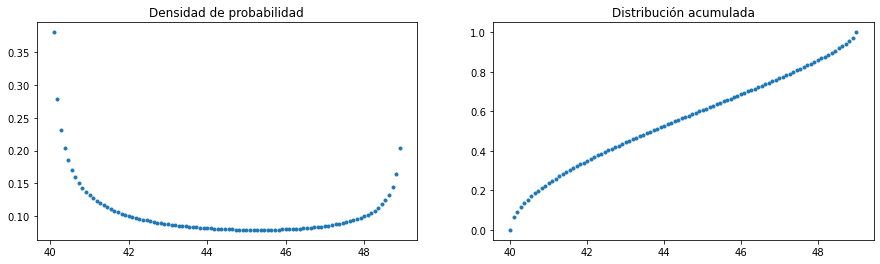

In [6]:
a=alfa
b=beta
x = np.linspace(40,49,100)
r = st.beta.pdf(x,a,b,loc=40,scale=9)
r_acum = st.beta.cdf(x,a,b,loc=40,scale=9)
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
ax1.plot(x,r,'o',markersize=3)
ax1.set_title('Densidad de probabilidad')
ax2.plot(x,r_acum,'o',markersize=3)
ax2.set_title('Distribución acumulada')
plt.show()

probabilidad $P(T\leq d)$.d = (40,49,10)

In [7]:
d = np.linspace(40,49,10)

In [8]:
st.beta.cdf(d,a,b,loc=40,scale=9)

array([0.        , 0.23675261, 0.34994198, 0.44304984, 0.52712816,
       0.60702857, 0.68606222, 0.76772519, 0.85828336, 1.        ])

DISTRIBUCIÓN TRIANGULAR 

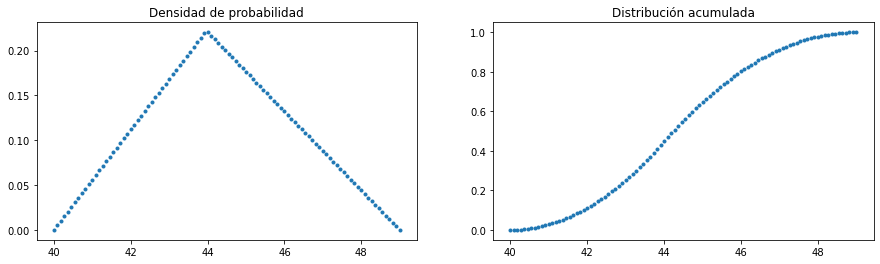

In [9]:
c = .44
x = np.linspace(40,49,100)
r = st.triang.pdf(x,c,loc=40,scale=9)
r_acum = st.triang.cdf(x,c,loc=40,scale=9)
# Graficamos
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
ax1.plot(x,r,'o',markersize=3)
ax1.set_title('Densidad de probabilidad')
ax2.plot(x,r_acum,'o',markersize=3)
ax2.set_title('Distribución acumulada')
plt.show()

Probabilidad de que $P(T\leq d)$.

In [10]:
d = np.linspace(40,49,10)
st.triang.cdf(d,c,loc=40,scale=9)

array([0.        , 0.02805836, 0.11223345, 0.25252525, 0.44885362,
       0.64726631, 0.8015873 , 0.91181658, 0.97795414, 1.        ])

# Tarea 7

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe.

In [42]:
# Código de solución 
#Función de integración montecarlo per se, a partir de valores aleatorios.
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

def estratificación(B: 'N estratos a crear'):
    '''Función que recibe y crea N número de estratos para el método de estratificación: 
    Divide la población en estratos y se genera en cada uno un número de observaciones
    proporcional a su tamaño (a la probabilidad de cada uno) para así asegurarnos que
    se cubre el dominio y se acelere la convergencia.
   '''
    u= np.random.uniform(a,b,B) #generar B valores aleatorios con distribución uniforme en el intervalo [a,b]
    i=np.arange(0,B) # variable iterable sobre los n estratos creados
    v = (u+i)/B #estratificación
    return v

In [45]:
I = 1/3 # Resultado de la integral
a,b = 0,1 #Intervalo de integración
N = np.logspace(1,7,7,dtype=int) # N términos, en escala logarítmica (1, 10, 100, 1000, …, en vez de 0, 1, 2, 3) 
df_cv = pd.DataFrame(index=N,columns=['Montecarlo crudo', 'Error_relativo MC %', 'Muestreo estratificado',
                                      'Error_relativo M_est %' ], dtype='float') # Creación de columnas de DataFrame
df_cv.index.name = "Términos" #Nombrar índice de df.
# Números aleatorios dependiente de la cantidad de términos N.
u1 = list(map(lambda N:np.random.uniform(a,b,N),N)) #Números aleatorios para el método montecarlo.
u2= list(map(estratificación, N)) #Números aleatorios para el método de estratificación.
M= [int_montecarlo(lambda x:x**2, a, b, Y) for Y in u1] #Aplicación del método de MonteCarlo para los u1 números generados.
EST= [int_montecarlo(lambda x:x**2, a, b, Y) for Y in u2] #Aplicación del método de MonteCarlo para las u2 variables estratificadas.
df_cv.loc[N,"Montecarlo crudo"] = M #Método de MonteCarlo crudo en DataFrame sobre N términos.
df_cv.loc[N,"Error_relativo MC %"] = np.abs(df_cv.loc[N,"Montecarlo crudo"]-I)*100/I #Error relativo del método montecarlo
df_cv.loc[N,"Muestreo estratificado"] = EST #Método de Estratificación
df_cv.loc[N,"Error_relativo M_est %"] = np.abs(df_cv.loc[N,"Muestreo estratificado"]-I)*100/I #Error relativo del método de estratificación
df_cv

,Montecarlo crudo,Error_relativo MC %,Muestreo estratificado,Error_relativo M_est %
Términos,,,,
10,0.347793,4.337874,0.336033,8.098418e-01
100,0.357339,7.201707,0.333504,5.122552e-02
1000,0.337953,1.386016,0.333343,2.946842e-03
10000,0.334824,0.447347,0.333333,9.086327e-05
100000,0.333231,0.030580,0.333333,2.512735e-06
1000000,0.333736,0.120782,0.333333,5.250833e-09
10000000,0.333211,0.036627,0.333333,9.799161e-10


Una muestra estratificada divide la población en estratos y genera un número de observaciones proporcional a su probabilidad 
de ocurrencia. De este modo, se cubre el dominio y aceleramos la convergencia a los resultados con mayor precisión.


Por requerir de una menor cantidad de términos, este proceso tiene una menor carga computacional y eficienta procesos.